In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import json

## Outside

In [5]:
_1a = pd.read_csv("./DublinData/extracted_data/fig1a_rssi_vs_dist_garden_samsung.csv",delimiter=" ",usecols=[3,5],header=None)

In [6]:
d = _1a.values[:,0]
rss = _1a.values[:,1]

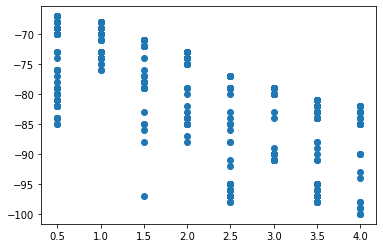

In [7]:
plt.scatter(d,rss)

In [8]:
# fit model parameters to this data
d = 10*np.log10(d)
reg = LinearRegression().fit(d.reshape(-1,1), rss)
outside_m = reg.coef_
outside_b = reg.intercept_
print("Pathloss exponent:",-outside_m[0])
print("Reference gain:",outside_b)
noise_samples = rss - (outside_m[0]*d+outside_b)
print("Noise standard deviation:",np.std(noise_samples))
outside_n = np.std(noise_samples)

Pathloss exponent: 1.7919550394303805
Reference gain: -75.0140380978919
Noise standard deviation: 6.448447781332552


## Inside

In [9]:
_2a = pd.read_csv("./DublinData/extracted_data/fig2a_rssi_vs_dist_indoors.csv",delimiter=" ",usecols=[3,5],header=None)

In [10]:
d = _2a.values[:,0]
rss = _2a.values[:,1]

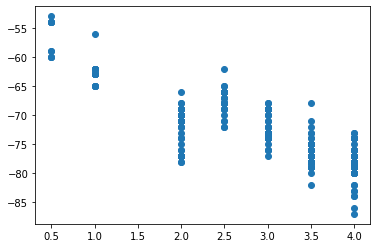

In [11]:
plt.scatter(d,rss)

In [12]:
# fit model parameters to this data
d = 10*np.log10(d)
reg = LinearRegression().fit(d.reshape(-1,1), rss)
m = reg.coef_
b = reg.intercept_
print("Pathloss exponent:",-m[0])
print("Reference gain:",b)
noise_samples = rss - (m[0]*d+b)
print("Noise standard deviation:",np.std(noise_samples))

Pathloss exponent: 2.3157825451170186
Reference gain: -62.91895634916471
Noise standard deviation: 3.4418272075659933


In [13]:
# for table scenario (across table)
rss_1 = m*np.linalg.norm([0.8,1])+b
std_1 = np.std(noise_samples)
print(rss_1,std_1)

[-65.88460502] 3.4418272075659933


## Train

In [14]:
_12a = pd.read_csv("./DublinData/extracted_data/fig12a_rssi_vs_dist_train.csv",delimiter=" ",usecols=[3,5],header=None)

In [15]:
d = _12a.values[:,0]
rss = _12a.values[:,1]

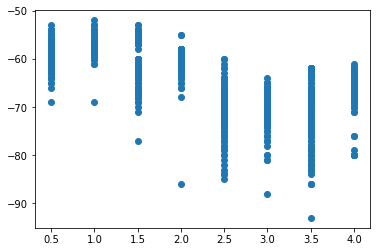

In [16]:
plt.scatter(d,rss)

In [17]:
# fit model parameters to this data
d = 10*np.log10(d)
reg = LinearRegression().fit(d.reshape(-1,1), rss)
m = reg.coef_
b = reg.intercept_
print("Pathloss exponent:",-m[0])
print("Reference gain:",b)
noise_samples = rss - (m[0]*d+b)
print("Noise standard deviation:",np.std(noise_samples))
std_2 = np.std(noise_samples)

Pathloss exponent: 1.364031958173685
Reference gain: -60.45173678877618
Noise standard deviation: 5.054001120182359


In [18]:
# for train scenario, across aisle
rss_2 = m*np.linalg.norm(np.subtract([1,0],[0,1]))+b
print(rss_2)
rss_3 = m*np.linalg.norm(np.subtract([2.7,0],[0,1]))+b
print(rss_3)
rss_4 = m*np.linalg.norm(np.subtract([1,0],[2.7,0]))+b
print(rss_4)

[-62.38076928]
[-64.37910672]
[-62.77059112]


## Values from experiments

In [19]:
extracted = []
for filename in ["./DublinData/extracted_data/fig9a_table_dl_and_mike.csv",
                 "./DublinData/extracted_data/fig9b_table_dl_and_euan.csv",
                 "./DublinData/extracted_data/fig9c_table_dl_and_mike_handsets_on_table.csv",
                 "./DublinData/extracted_data/fig9d_table_dl_and_euan_handsets_on_table.csv",
                "./DublinData/extracted_data/fig11a_sligotrain_sitting1.csv",
                "./DublinData/extracted_data/fig11c_sligotrain_sitting2.csv",
                "./DublinData/extracted_data/fig11d_sligotrain_sitting3.csv",
                "./DublinData/extracted_data/fig14a_lidl_2m.csv",
                "./DublinData/extracted_data/fig14c_lidl_4m_2.csv"]:
    print(filename)
    data = pd.read_csv(filename,delimiter=" ",usecols=[3,5],header=None)
    mean = np.mean(data.values[:,1])
    print("mean:",mean)
    std = np.std(data.values[:,1])
    print("std:",std)
    extracted.append(mean)
    extracted.append(std)

./DublinData/extracted_data/fig9a_table_dl_and_mike.csv
mean: -89.29166666666667
std: 3.2336662199772914
./DublinData/extracted_data/fig9b_table_dl_and_euan.csv
mean: -81.38888888888889
std: 4.124976617965904
./DublinData/extracted_data/fig9c_table_dl_and_mike_handsets_on_table.csv
mean: -65.4047619047619
std: 5.214720573299817
./DublinData/extracted_data/fig9d_table_dl_and_euan_handsets_on_table.csv
mean: -65.77142857142857
std: 1.972463496467795
./DublinData/extracted_data/fig11a_sligotrain_sitting1.csv
mean: -62.02272727272727
std: 3.2605676887457133
./DublinData/extracted_data/fig11c_sligotrain_sitting2.csv
mean: -69.56696428571429
std: 2.0299053634193824
./DublinData/extracted_data/fig11d_sligotrain_sitting3.csv
mean: -65.99065420560747
std: 5.344217465605097
./DublinData/extracted_data/fig14a_lidl_2m.csv
mean: -87.31818181818181
std: 7.438961908087207
./DublinData/extracted_data/fig14c_lidl_4m_2.csv
mean: -95.34883720930233
std: 3.1761005851495887


## Effect of body (front pocket v back pocket)

In [20]:
_4 = pd.read_csv("./DublinData/extracted_data/fig4_human_body_controlled_test.csv",delimiter=" ",usecols=[3,5],header=None)

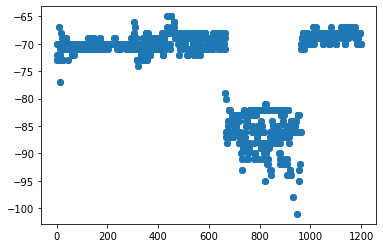

In [21]:
plt.scatter(_4.values[:,0],_4.values[:,1])

In [22]:
print("without body:",np.mean(_4.values[:,1][np.where(_4.values[:,1]>=-80)]))
print("with body:",np.mean(_4.values[:,1][np.where(_4.values[:,1]<-80)]))
print("difference:",np.mean(_4.values[:,1][np.where(_4.values[:,1]>=-80)])-np.mean(_4.values[:,1][np.where(_4.values[:,1]<-80)]))
body = np.mean(_4.values[:,1][np.where(_4.values[:,1]>=-80)])-np.mean(_4.values[:,1][np.where(_4.values[:,1]<-80)])

without body: -69.52
with body: -86.06716417910448
difference: 16.547164179104485


In [23]:
print("without body:",np.std(_4.values[:,1][np.where(_4.values[:,1]>=-80)]))
print("with body:",np.std(_4.values[:,1][np.where(_4.values[:,1]<-80)]))
print("difference:",np.std(_4.values[:,1][np.where(_4.values[:,1]>=-80)])-np.std(_4.values[:,1][np.where(_4.values[:,1]<-80)]))
body_var = np.std(_4.values[:,1][np.where(_4.values[:,1]>=-80)])-np.std(_4.values[:,1][np.where(_4.values[:,1]<-80)])

without body: 1.4630478771759627
with body: 3.463450443278382
difference: -2.0004025661024194


## Effect of purse

In [24]:
_5 = pd.read_csv("./DublinData/extracted_data/fig5_handbag.csv",delimiter=" ",usecols=[3,5],header=None)

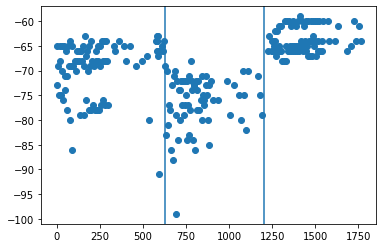

In [25]:
plt.scatter(_5.values[:,0],_5.values[:,1])
plt.axvline(630)
plt.axvline(1200)

In [26]:
print("without purse:",np.mean(_5.values[:,1][163:]))
print("with purse:",np.mean(_5.values[:,1][93:163]))
print("difference:",np.mean(_5.values[:,1][163:])-np.mean(_5.values[:,1][93:163]))
purse = np.mean(_5.values[:,1][163:])-np.mean(_5.values[:,1][93:163])

without purse: -63.83529411764706
with purse: -76.3
difference: 12.464705882352938


In [27]:
print("without purse:",np.std(_5.values[:,1][163:]))
print("with purse:",np.std(_5.values[:,1][93:163]))
print("difference:",np.std(_5.values[:,1][163:])-np.std(_5.values[:,1][93:163]))
purse_var = np.std(_5.values[:,1][163:])-np.std(_5.values[:,1][93:163])

without purse: 2.524454787140847
with purse: 5.351501791887155
difference: -2.8270470047463077


In [28]:
scenarios = {}

# At a table, phones on table

In [29]:
# locations from paper, cross measurements assumed from inside model
locs = np.array([[0,0],[0.8,0],[0,1],[0.8,1]])
rss = np.array([[0,extracted[4],extracted[6],rss_1[0]],
               [extracted[4],0,rss_1[0],extracted[6]],
               [extracted[6],rss_1[0],0,extracted[4]],
               [rss_1[0],extracted[6],extracted[4],0]])
std = np.array([[0,extracted[5],extracted[7],std_1],
               [extracted[5],0,std_1,extracted[7]],
               [extracted[7],std_1,0,extracted[5]],
               [std_1,extracted[7],extracted[5],0]])

In [30]:
print(locs)
print(rss)
print(std)
scenarios["phone_table"] = {"locs":locs.tolist(),"rss":rss.tolist(),"std":std.tolist()}

[[0.  0. ]
 [0.8 0. ]
 [0.  1. ]
 [0.8 1. ]]
[[  0.         -65.4047619  -65.77142857 -65.88460502]
 [-65.4047619    0.         -65.88460502 -65.77142857]
 [-65.77142857 -65.88460502   0.         -65.4047619 ]
 [-65.88460502 -65.77142857 -65.4047619    0.        ]]
[[0.         5.21472057 1.9724635  3.44182721]
 [5.21472057 0.         3.44182721 1.9724635 ]
 [1.9724635  3.44182721 0.         5.21472057]
 [3.44182721 1.9724635  5.21472057 0.        ]]


# At a table, phones in pockets

In [31]:
# for across the table
d = 10*np.log10([0.8,1])
reg = LinearRegression().fit(d.reshape(-1,1), [extracted[2],extracted[0]])
m = reg.coef_
b = reg.intercept_
print("estimate hypotenuse")
print(m*np.linalg.norm([0.8,1])+b)
rss_5 = m*np.linalg.norm([0.8,1])+b

estimate hypotenuse
[-99.73485336]


In [32]:
# locations from paper, cross measurements assumed from inside model plus assumed pocket attenuation
locs = np.array([[0,0],[0.8,0],[0,1],[0.8,1]])
rss = np.array([[0,extracted[0],extracted[2],rss_5[0]],
               [extracted[0],0,rss_5[0],extracted[2]],
               [extracted[2],rss_5[0],0,extracted[0]],
               [rss_5[0],extracted[2],extracted[0],0]])
std = np.array([[0,extracted[1],extracted[3],std_1],
               [extracted[1],0,std_1,extracted[3]],
               [extracted[3],std_1,0,extracted[1]],
               [std_1,extracted[3],extracted[1],0]])

In [33]:
print(locs)
print(rss)
print(std)
scenarios["phone_pocket"] = {"locs":locs.tolist(),"rss":rss.tolist(),"std":std.tolist()}

[[0.  0. ]
 [0.8 0. ]
 [0.  1. ]
 [0.8 1. ]]
[[  0.         -89.29166667 -81.38888889 -99.73485336]
 [-89.29166667   0.         -99.73485336 -81.38888889]
 [-81.38888889 -99.73485336   0.         -89.29166667]
 [-99.73485336 -81.38888889 -89.29166667   0.        ]]
[[0.         3.23366622 4.12497662 3.44182721]
 [3.23366622 0.         3.44182721 4.12497662]
 [4.12497662 3.44182721 0.         3.23366622]
 [3.44182721 4.12497662 3.23366622 0.        ]]


# On a train car

In [34]:
# other pairs assumed from on train parameters
locs = np.array([[0,0],[1,0],[2.7,0],[0,1]])
rss = np.array([[0,extracted[12],extracted[10],extracted[8]],
               [extracted[12],0,rss_4[0],rss_2[0]],
               [extracted[10],rss_4[0],0,rss_3[0]],
               [extracted[8],rss_2[0],rss_3[0],0]])
std = np.array([[0,extracted[13],extracted[11],extracted[9]],
               [extracted[13],0,std_2,std_2],
               [extracted[11],std_2,0,std_2],
               [extracted[9],std_2,std_2,0]])

In [35]:
print(locs)
print(rss)
print(std)
scenarios["train"] = {"locs":locs.tolist(),"rss":rss.tolist(),"std":std.tolist()}

[[0.  0. ]
 [1.  0. ]
 [2.7 0. ]
 [0.  1. ]]
[[  0.         -65.99065421 -69.56696429 -62.02272727]
 [-65.99065421   0.         -62.77059112 -62.38076928]
 [-69.56696429 -62.77059112   0.         -64.37910672]
 [-62.02272727 -62.38076928 -64.37910672   0.        ]]
[[0.         5.34421747 2.02990536 3.26056769]
 [5.34421747 0.         5.05400112 5.05400112]
 [2.02990536 5.05400112 0.         5.05400112]
 [3.26056769 5.05400112 5.05400112 0.        ]]


# In a grocery line

In [36]:
locs = np.array([[0,0],[0,2],[0,4]])
rss = np.array([[0,extracted[14],extracted[16]],
                [extracted[14],0,extracted[14]],
                [extracted[16],extracted[14],0]])
std = np.array([[0,extracted[15],extracted[17]],
                [extracted[15],0,extracted[15]],
                [extracted[17],extracted[15],0]])

In [37]:
print(locs)
print(rss)
print(std)
scenarios["simple_grocery"] = {"locs":locs.tolist(),"rss":rss.tolist(),"std":std.tolist()}

[[0 0]
 [0 2]
 [0 4]]
[[  0.         -87.31818182 -95.34883721]
 [-87.31818182   0.         -87.31818182]
 [-95.34883721 -87.31818182   0.        ]]
[[0.         7.43896191 3.17610059]
 [7.43896191 0.         7.43896191]
 [3.17610059 7.43896191 0.        ]]


# Made up scenario with pockets and purses and people in line

In [38]:
locs = np.array([[0,0],[0,1],[2,0.5],[4,0],[4,1],[6,1]])
rss = np.zeros((6,6))
std = np.zeros((6,6))
std.fill(outside_n)
np.fill_diagonal(std,0)
for i in range(6):
    for j in range(6):
        if i != j:
            rss[i][j] = outside_m*np.linalg.norm(np.subtract(locs[i],locs[j]))+outside_b
            
loss = np.array([[0,body,max(body,purse),max(body,body),max(body,purse),body],
                 [body,0,purse,body,purse,0],
                 [max(body,purse),purse,0,max(body,purse),max(purse,purse),purse],
                 [max(body,body),body,max(body,purse),0,purse,0],
                 [max(body,purse),purse,max(purse,purse),purse,0,purse],
                 [body,0,purse,0,purse,0]])
std_loss = np.array([[0,body_var,max(body_var,purse_var),max(body_var,body_var),max(body_var,purse_var),body_var],
                 [body_var,0,purse_var,body_var,purse_var,0],
                 [max(body_var,purse_var),purse_var,0,max(body_var,purse_var),max(purse_var,purse_var),purse_var],
                 [max(body_var,body_var),body_var,max(body_var,purse_var),0,purse_var,0],
                 [max(body_var,purse_var),purse_var,max(purse_var,purse_var),purse_var,0,purse_var],
                 [body_var,0,purse_var,0,purse_var,0]])
rss = rss - loss
std = std - std_loss

In [39]:
print(locs)
print(rss)
print(std)
scenarios["complex_grocery"] = {"locs":locs.tolist(),"rss":rss.tolist(),"std":std.tolist()}

[[0.  0. ]
 [0.  1. ]
 [2.  0.5]
 [4.  0. ]
 [4.  1. ]
 [6.  1. ]]
[[   0.          -93.35315732  -95.25541223  -98.72902243  -98.94962218
  -102.46123925]
 [ -93.35315732    0.          -91.17295393  -98.94962218  -94.64656414
   -85.76576833]
 [ -95.25541223  -91.17295393    0.          -95.25541223  -91.17295393
   -94.70234568]
 [ -98.72902243  -98.94962218  -95.25541223    0.          -89.27069902
   -79.02097138]
 [ -98.94962218  -94.64656414  -91.17295393  -89.27069902    0.
   -91.06265406]
 [-102.46123925  -85.76576833  -94.70234568  -79.02097138  -91.06265406
     0.        ]]
[[0.         8.44885035 8.44885035 8.44885035 8.44885035 8.44885035]
 [8.44885035 0.         9.27549479 8.44885035 9.27549479 6.44844778]
 [8.44885035 9.27549479 0.         8.44885035 9.27549479 9.27549479]
 [8.44885035 8.44885035 8.44885035 0.         9.27549479 6.44844778]
 [8.44885035 9.27549479 9.27549479 9.27549479 0.         9.27549479]
 [8.44885035 6.44844778 9.27549479 6.44844778 9.27549479 0.  

# Scenarios

In [40]:
scenarios

{'phone_table': {'locs': [[0.0, 0.0], [0.8, 0.0], [0.0, 1.0], [0.8, 1.0]],
  'rss': [[0.0, -65.4047619047619, -65.77142857142857, -65.88460501781725],
   [-65.4047619047619, 0.0, -65.88460501781725, -65.77142857142857],
   [-65.77142857142857, -65.88460501781725, 0.0, -65.4047619047619],
   [-65.88460501781725, -65.77142857142857, -65.4047619047619, 0.0]],
  'std': [[0.0, 5.214720573299817, 1.972463496467795, 3.4418272075659933],
   [5.214720573299817, 0.0, 3.4418272075659933, 1.972463496467795],
   [1.972463496467795, 3.4418272075659933, 0.0, 5.214720573299817],
   [3.4418272075659933, 1.972463496467795, 5.214720573299817, 0.0]]},
 'phone_pocket': {'locs': [[0.0, 0.0], [0.8, 0.0], [0.0, 1.0], [0.8, 1.0]],
  'rss': [[0.0, -89.29166666666667, -81.38888888888889, -99.73485336353109],
   [-89.29166666666667, 0.0, -99.73485336353109, -81.38888888888889],
   [-81.38888888888889, -99.73485336353109, 0.0, -89.29166666666667],
   [-99.73485336353109, -81.38888888888889, -89.29166666666667, 0.0

In [41]:
with open('scenario_data.json', 'w') as fp:
    json.dump(scenarios, fp, indent=4)